# Multiclass classification with the Iris dataset

The Iris dataset consists of 3 different classes of irises (Setosa, Versicolour, and Virginica). Each iris is described by four features: Sepal Length, Sepal Width, Petal Length and Petal Width. 

The objective of this exercice is to train a multiclass classification model using the [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model available in `scikit-learn`.

<img src="images/iris-dataset.png" width="600">

## Initialisation

Load the following libraries.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Question 1: Data exploration

Load the Iris dataset (run the cell below). The dataset contains 150 examples, stored in 150x4 numpy array. The rows being the samples and the columns being the features. As there are 3 classes of irises, each example corresponds to a target value: `0 = setosa, 1 = versicolor, 2 = virginica`.

Explore the data

1. Make a histogram of each feature of the data. On each figure represent with a different color the 3 classes of Iris.
2. Show the scatter plots of each feature versus another different feature, again using a different color for each classes (you should make 6 figures in total).

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

# Load Iris dataset
iris = datasets.load_iris()

# data
X = iris.data   # features
y = iris.target # target

# description
feature_names = iris.feature_names
species = iris.target_names

print("Iris species:", species)
print("Features name:",feature_names)

#iris.filename # local file location

Iris species: ['setosa' 'versicolor' 'virginica']
Features name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


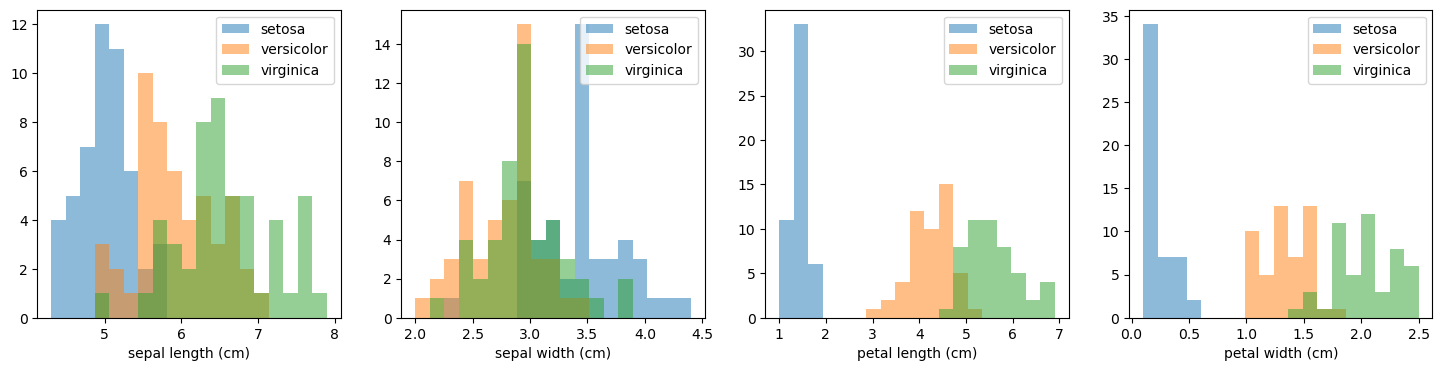

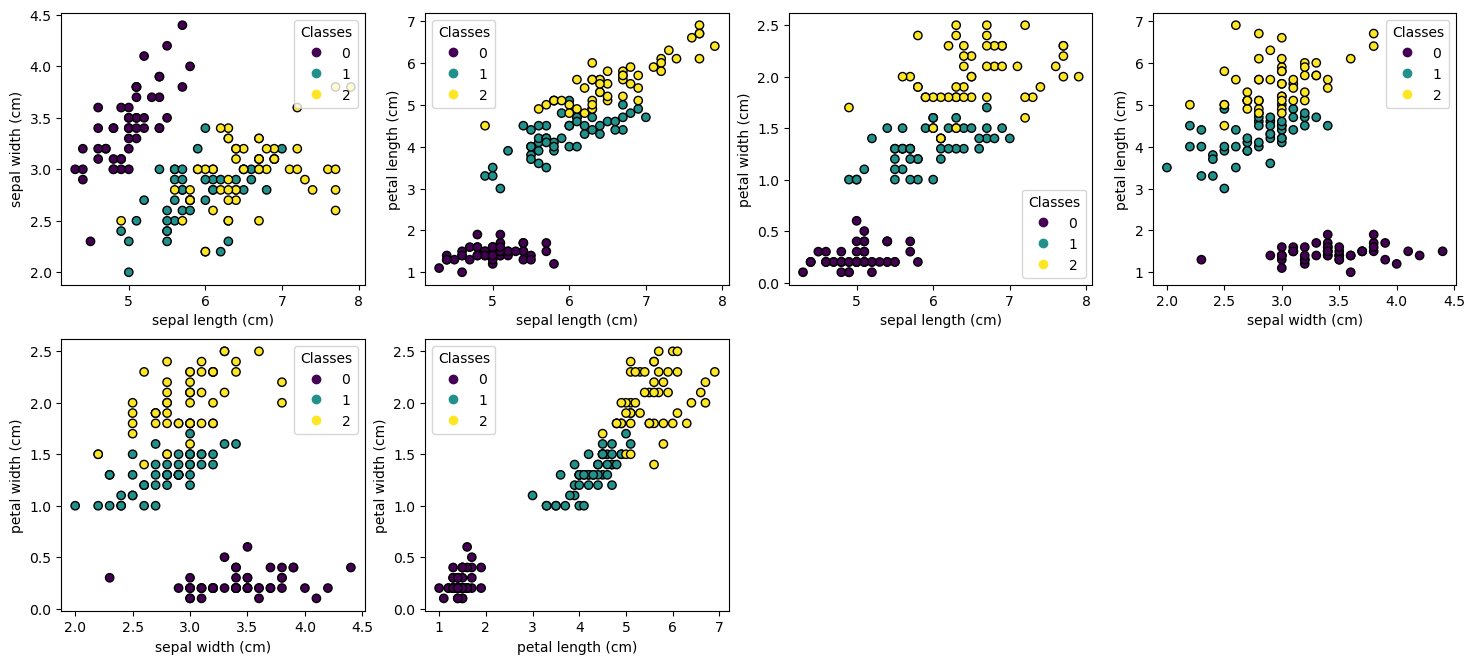

In [3]:
# 1. histograms
#--------------
def histplot(X,y,i):
    xmin = X.min(axis=0)
    xmax = X.max(axis=0)
    bins = np.linspace(xmin[i],xmax[i],20)
    _ = plt.hist(X[y==0][:,i],bins,alpha=0.5,label="setosa")
    _ = plt.hist(X[y==1][:,i],bins,alpha=0.5,label="versicolor")
    _ = plt.hist(X[y==2][:,i],bins,alpha=0.5,label="virginica")
    plt.xlabel(feature_names[i])
    plt.legend()

plt.figure(figsize=(18,4))
for i in range(0,4):
    plt.subplot(1, 4, i+1)
    histplot(X,y,i)
    
# 2. scatter plots
#-----------------
def scatterplots(X,y,i,j):
    scatter = plt.scatter(X[:, i], X[:, j], c=y, edgecolor="k")
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    legend1 = plt.legend(*scatter.legend_elements(),loc="best", title="Classes")


plt.figure(figsize=(18,12))
cnt=1
for i in range(0,4):
    for j in range(i,4):
        if (i != j):
            plt.subplot(3, 4, cnt)
            scatterplots(X,y,i,j)
            cnt+=1


## Question 2

1. Using the `train_test_split` method to split the dataset as follow: 2 third of the total sample size for training and 1 third for testing.

2. Initialize the logistic regression model (described here [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) with the following parameters:

  `model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)`
  
  Describe, briefly, the meaning of all the parameters of this function.

3. Train the model on the training set. Display the values of the weights and the bias terms.

4. Predict the class label for all samples in the training and test datasets. Give the accuracy of the prediction for both samples. Comment on the results.

5. For each class show a histogram of the probability estimate `predict_proba` of being in the right class. 

model weights: 
 [[-0.39100416  0.9143855  -2.2769867  -0.99442168]
 [ 0.37900151 -0.20071741 -0.20081482 -0.68956779]
 [ 0.01200264 -0.71366809  2.47780152  1.68398946]]

 model bias terms: 
 [  8.77213764   2.18053146 -10.9526691 ]

 The accuracy of Logistic Regression is (train dataset):  0.98

 The accuracy of Logistic Regression is (test dataset):  0.96


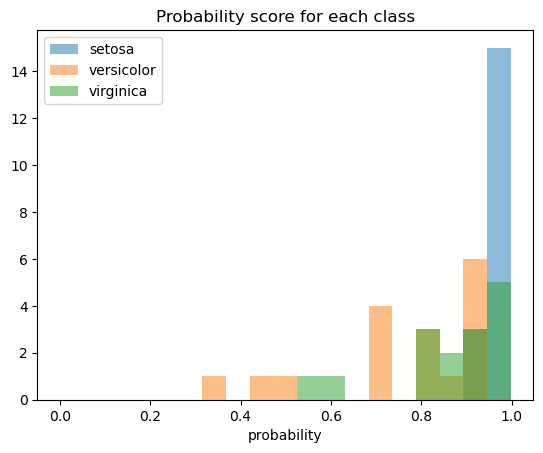

In [4]:
# 1. split data
#--------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.333,random_state=3)

# 2. Explanation of parameters: you will find useful documentation following these links:
#----------------------------------------------------------------------------------------
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# solvers and penalty: https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression
# OvR vs OvO: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
# about multiclass cross-entropy: https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451
# https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372

# 3. logistic regression
#-----------------------
model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)
model.fit(X_train, y_train)

print("model weights: \n",model.coef_)

print("\n model bias terms: \n",model.intercept_)

# 4. predicted labels
#--------------------
prediction = model.predict(X_train)
print('\n The accuracy of Logistic Regression is (train dataset): ', accuracy_score(prediction, y_train))

prediction = model.predict(X_test)
print('\n The accuracy of Logistic Regression is (test dataset): ', accuracy_score(prediction, y_test))

# 5. Predicted probability per class (softmax of Wx+b)
#-----------------------------------------------------
# https://github.com/scikit-learn/scikit-learn/blob/7e1e6d09b/sklearn/linear_model/_logistic.py#L1637
probability = model.predict_proba(X_test)
bins = np.linspace(probability.min(),probability.max(),20)
plt.hist(probability[y_test==0][:,0],bins,alpha=0.5,label="setosa")
plt.hist(probability[y_test==1][:,1],bins,alpha=0.5,label="versicolor")
plt.hist(probability[y_test==2][:,2],bins,alpha=0.5,label="virginica")
plt.xlabel("probability")
plt.title("Probability score for each class")
plt.legend()

## Question 3

1. Explain how the probability estimate `predict_proba` is computed. Redo the calculation of this probability on the test dataset by **only** using `numpy` tools. What are the differences with respect to the logistic regression method seen in the lecture ?

2. Explain how the predicted class (the output label) is determined for each example ?

Answers:

1. Probability estimate
For each of the $k={1..K}$ classes calculate:
$s_k = w_k^T.x + b_k$

Probability estimate for each class:

$$\text{probability}_k = \text{softmax}(s_k) = \frac{exp(s_k)}{\sum_{j=1}^K exp(s_j)}$$

2. Predicted label

In principle given by the position of the highest value un the probability estimate. However un scikit-learn the predict function calculates the label based on the signed distance of the sample to the decision hyperplane, that is just $s_k = w_k^T.x + b_k$:
```
        scores = safe_sparse_dot(X, self.coef_.T, dense_output=True) + self.intercept_
        return scores.ravel() if scores.shape[1] == 1 else scores
        indices = scores.argmax(axis=1)
```

In [5]:
# Calculate probability for each class using numpy

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def softmax(x):
    return (np.exp(x))/(np.exp(x).sum())


def probability_numpy(x,weights,bias):
    xlin = np.matmul(weights,x) + bias
    return softmax(xlin)

In [8]:
# 1. Example for few test sample
#--------------------------------

for i in np.arange(0,5,1):
    x = X_test[i]
    prob_numpy = probability_numpy(x,model.coef_,model.intercept_)
    prob_logreg = probability[i]
    print('Example %d:' %i)
    print("probability estimate (log. regr.):",prob_logreg)
    print("probability estimate (using numpy)",prob_numpy) # for multiclass softmax is used in place of sigmoid to calculate probabilities

    
# 2. predicted class
#-------------------
# See: https://github.com/scikit-learn/scikit-learn/blob/7e1e6d09b/sklearn/linear_model/_base.py#L411


Example 0:
probability estimate (log. regr.): [9.74674534e-01 2.53253435e-02 1.22639967e-07]
probability estimate (using numpy) [9.74674534e-01 2.53253435e-02 1.22639967e-07]
Example 1:
probability estimate (log. regr.): [9.65482577e-01 3.45171929e-02 2.29995926e-07]
probability estimate (using numpy) [9.65482577e-01 3.45171929e-02 2.29995926e-07]
Example 2:
probability estimate (log. regr.): [9.52061889e-01 4.79377825e-02 3.28236758e-07]
probability estimate (using numpy) [9.52061889e-01 4.79377825e-02 3.28236758e-07]
Example 3:
probability estimate (log. regr.): [9.37264194e-01 6.27353093e-02 4.96650042e-07]
probability estimate (using numpy) [9.37264194e-01 6.27353093e-02 4.96650042e-07]
Example 4:
probability estimate (log. regr.): [9.79624250e-01 2.03756753e-02 7.48228010e-08]
probability estimate (using numpy) [9.79624250e-01 2.03756753e-02 7.48228010e-08]


## Question 4

Show the decision surfaces on the scatter plots of each feature versus another (question 1.2), with different color for each classes.

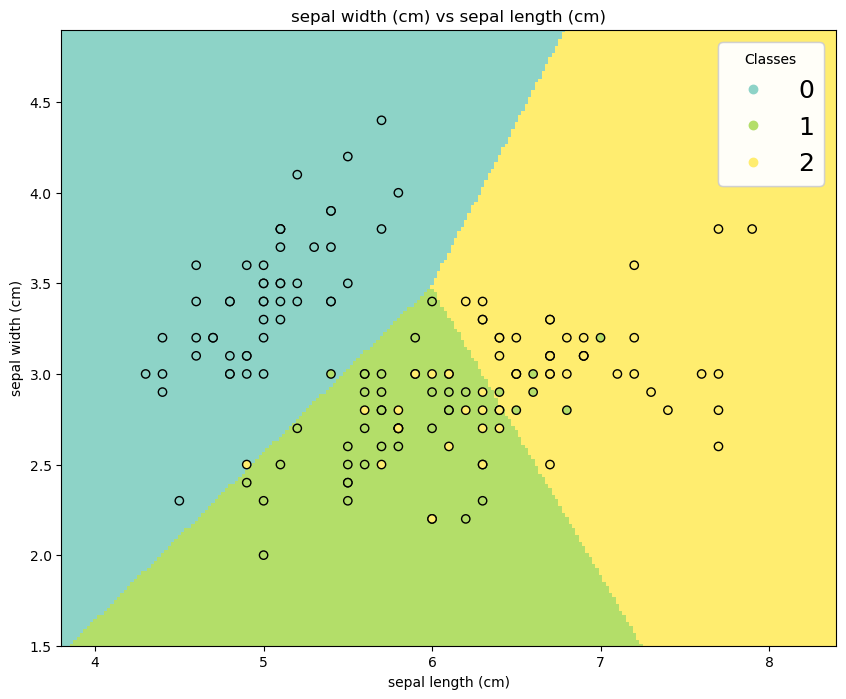

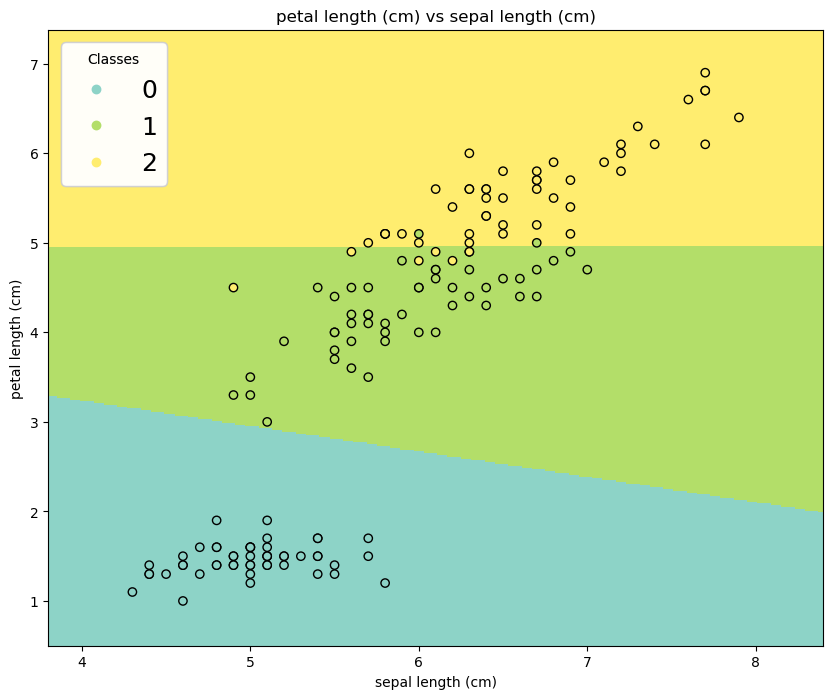

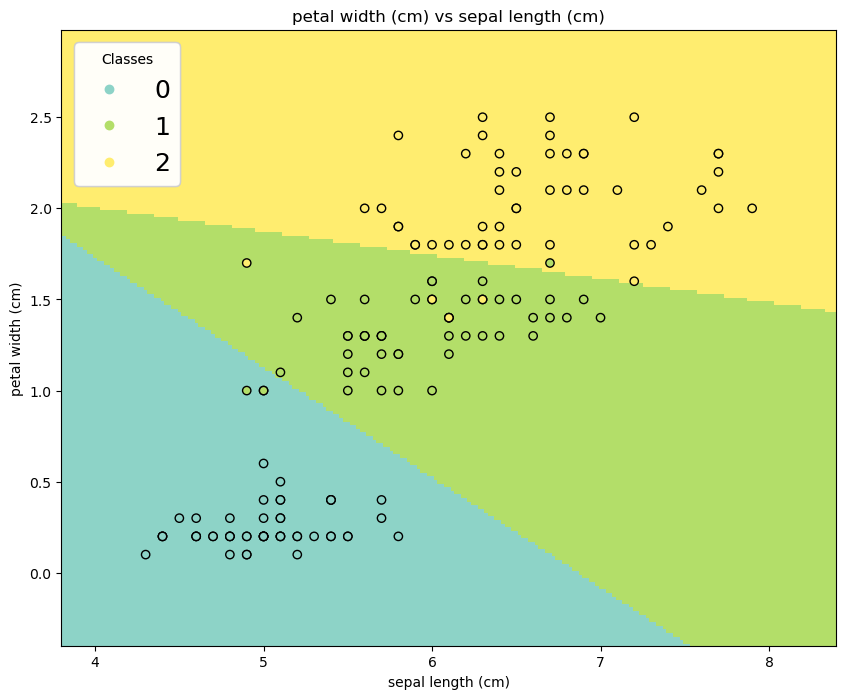

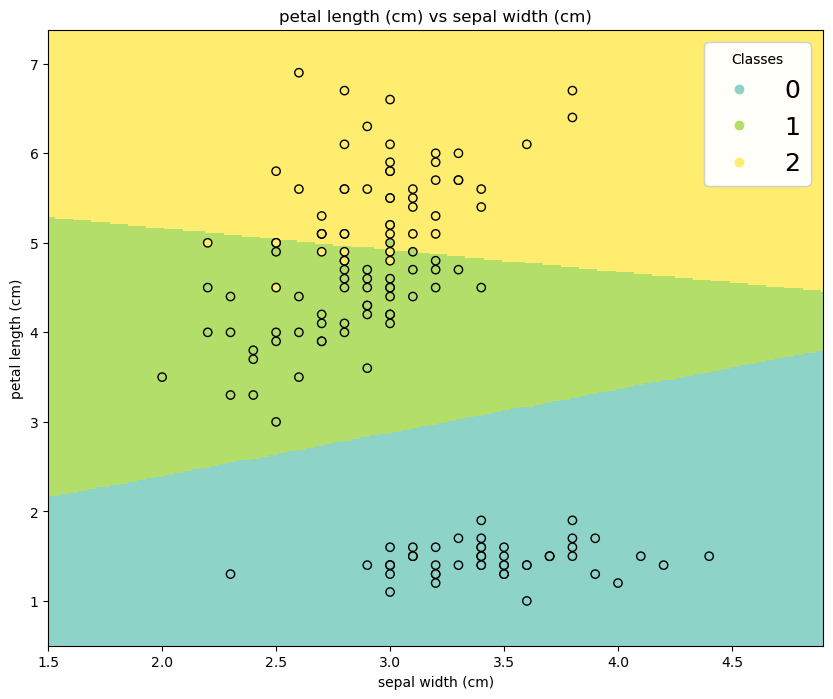

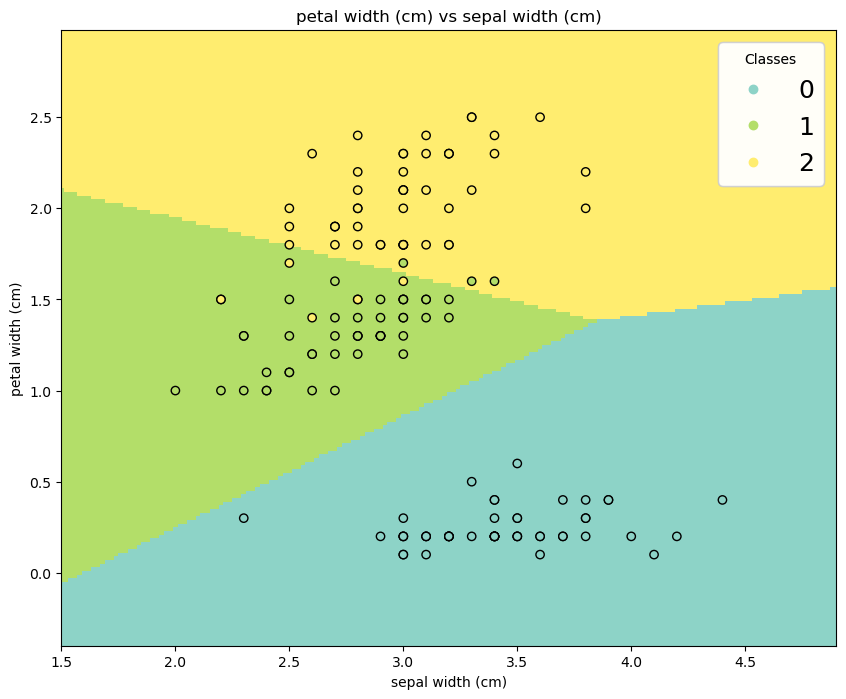

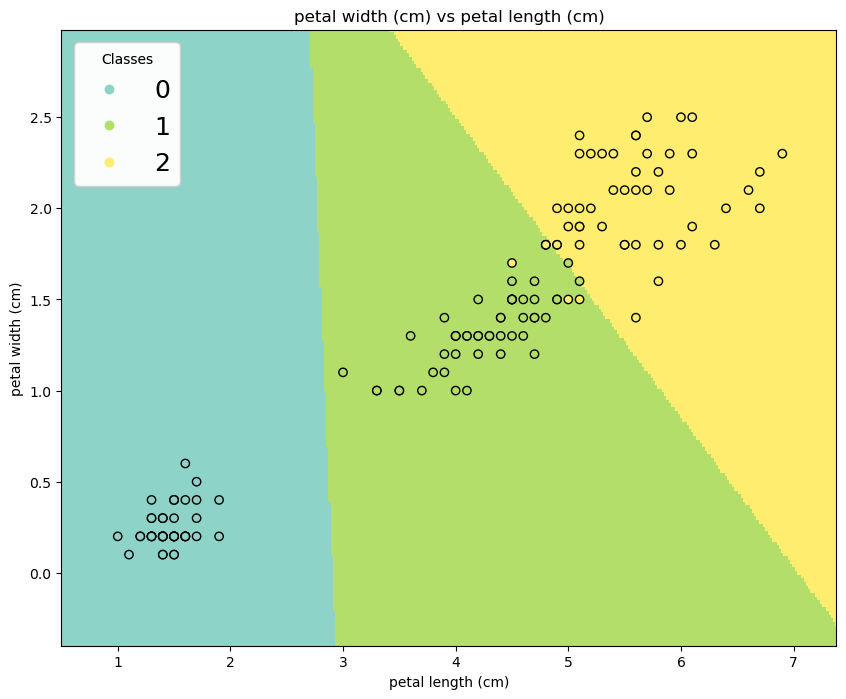

In [7]:
#
# Solution proposed by Luca Balzani - IMAPP student 2021-2022
#


# Show decision boundaries:
# https://scikit-learn.org/dev/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py

c=['tab:blue','tab:orange','tab:green']

for u in range(3):
    for e in range(u+1,4):
        logreg = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500, random_state=3)
        a = X_test[:,u]
        b = X_test[:,e]
        c = np.c_[a,b]
        logreg.fit(c, y_test)
        x_min, x_max = X[:, u].min() - 0.5, X[:, u].max() + 0.5
        y_min, y_max = X[:, e].min() - 0.5, X[:, e].max() + 0.5
        h = 0.02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #meshgrid to divide the plane in many pieces to compute the higher probability
        Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

        
        Z = Z.reshape(xx.shape)
        fig, ax = plt.subplots(figsize=(10,8));
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3,shading='auto')

        
        scatter = ax.scatter(X[:, u], X[:, e], c=y, edgecolors="k", cmap=plt.cm.Set3);
        
        legend1 = ax.legend(*scatter.legend_elements(), loc="best", fontsize=18, title='Classes');
        ax.add_artist(legend1);
        
        plt.xlabel(feature_names[u])
        plt.ylabel(feature_names[e])
        
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(feature_names[e]+' vs '+feature_names[u]);

        plt.show();
